Importamos las dependencias necesarias para el desarrollo del trabajo.

In [90]:
from main import runGame
from matplotlib.ticker import FuncFormatter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Aqui vemos un ejemplo de como ejecutar el juego.

In [2]:
runGame(['main.py', '-l', 'level2.txt', '-m', 'astar', '-H', 'manhattan'])

{'success': True,
 'method': 'astar',
 'level': 'level2.txt',
 'heuristic': 'manhattan',
 'cost': 78,
 'exploredNodes': 58629,
 'frontierNodes': 97,
 'runtime': 6.965683698654175}

Ahora realizamos 10 iteraciones de la función runGame con cada algoritmo de búsqueda, para cada nivel y para cada heuristica. Nos guardamos estos resultados en un dataframe para poder analizarlos más adelante.

In [3]:
methods = ['dfs', 'bfs', 'greedy', 'astar']
heuristics = ['manhattan', 'combined']
levels = ['level1.txt', 'level2.txt', 'level3.txt', 'level4.txt', 'level5.txt']

aux = []

for level in levels:
    for method in methods:
        for heuristic in heuristics:
            for _ in range(10):
                aux.append(runGame(['main.py', '-l', level, '-m', method, '-H', heuristic]))

df = pd.DataFrame(aux)
df

,success,method,level,heuristic,cost,exploredNodes,frontierNodes,runtime
0,True,dfs,level1.txt,manhattan,3,22,1,0.000000
1,True,dfs,level1.txt,manhattan,3,22,1,0.000000
2,True,dfs,level1.txt,manhattan,3,22,1,0.000000
3,True,dfs,level1.txt,manhattan,3,22,1,0.000944
4,True,dfs,level1.txt,manhattan,3,22,1,0.000000
...,...,...,...,...,...,...,...,...
395,False,astar,level5.txt,combined,0,17,0,0.000000
396,False,astar,level5.txt,combined,0,17,0,0.000000
397,False,astar,level5.txt,combined,0,17,0,0.000000
398,False,astar,level5.txt,combined,0,17,0,0.001001


En esta parte, normalizamos los datos obtenidos en el punto anterior. Como los algoritmos de búsqueda desinformados no utilizan heurísticas para decidir qué camino tomar, separamos el dataframe original en 2 diferentes: uno para los métodos de búsqueda desinformados y otro para los informados.

Una vez realizado ese proceso, del dataframe de los métodos desinformados, eliminamos la columna heurística ya que no es necesaria. Y del dataframe de los métodos informados, agregamos la heurística utilizada en cada caso como parte del nombre del método entre parentesis con el objetivo de luego eliminar la columna heurística y asi tener los dos dataframes con las mismas columnas.

Por último, concatenamos estos 2 dataframes en uno solo con el que trabajaremos más adelante para realizar los gráficos y analizar los datos.

In [5]:

informed_methods_df = df[(df['method'] == 'astar') | (df['method'] == 'greedy')]
informed_methods_df.loc[:, 'method'] = informed_methods_df['method'] + '(' + informed_methods_df['heuristic'] + ')'
informed_methods_df = informed_methods_df.drop('heuristic', axis=1)

uninformed_methods_df = df[(df['method'] == 'bfs') | (df['method'] == 'dfs')]
uninformed_methods_df = uninformed_methods_df.drop('heuristic', axis=1)

final_df = pd.concat([uninformed_methods_df, informed_methods_df])

Como medida de precaución, guardamos la información de los diferentes dataframes en archivos csv.

In [6]:
df.to_csv('data/data.csv')
uninformed_methods_df.to_csv('data/uninformed.csv')
informed_methods_df.to_csv('data/informed.csv')
final_df.to_csv('data/normalized_data.csv')

Si no se quiere volver a correr el código, se pueden cargar los archivos de datos ya procesados. Para ello descomentar la línea de código correspondiente en el siguiente bloque.


In [ ]:
# df = pd.read_csv('data/data.csv')
# uninformed_methods_df = pd.read_csv('data/uninformed.csv')
# informed_methods_df = pd.read_csv('data/informed.csv')
# final_df = pd.read_csv('data/normalized_data.csv')

In [47]:
final_df.groupby(['level','method']).mean(numeric_only=True)

success    cost  exploredNodes  frontierNodes  \
level      method                                                             
level1.txt astar(combined)        1.0     3.0            7.0            1.0   
           astar(manhattan)       1.0     3.0            7.0            1.0   
           bfs                    1.0     3.0            7.0            1.0   
           dfs                    1.0     3.0           22.0            1.0   
           greedy(combined)       1.0     3.0            6.0            1.0   
           greedy(manhattan)      1.0     3.0            6.0            1.0   
level2.txt astar(combined)        1.0    78.0        58387.0          137.0   
           astar(manhattan)       1.0    78.0        58629.0           97.0   
           bfs                    1.0    78.0        58804.0           54.0   
           dfs                    1.0  1698.0        19064.0          706.0   
           greedy(combined)       1.0   104.0         1765.0          131.0   
           greedy(manhattan)      1.0   104.0         1763.0          133.0   
level3.txt astar(combined)        1.0    10.0           77.0           21.0   
           astar(manhattan)       1.0    10.0           77.0           21.0   
           bfs                    1.0    10.0          136.0           43.0   
           dfs                    1.0    14.0          102.0            9.0   
           greedy(combined)       1.0    10.0           30.0            8.0   
           greedy(manhattan)      1.0    10.0           30.0            8.0   
level4.txt astar(combined)        1.0    60.0        86402.0         3884.0   
           astar(manhattan)       1.0    60.0        96954.0         3356.0   
           bfs                    1.0    60.0       112694.0         1732.0   
           dfs                    1.0  2912.0       106160.0         1409.0   
           greedy(combined)       1.0    74.0          806.0           85.0   
           greedy(manhattan)      1.0    64.0         1071.0          138.0   
level5.txt astar(combined)        0.0     0.0           17.0            0.0   
           astar(manhattan)       0.0     0.0           17.0            0.0   
           bfs                    0.0     0.0           17.0            0.0   
           dfs                    0.0     0.0           17.0            0.0   
           greedy(combined)       0.0     0.0           17.0            0.0   
           greedy(manhattan)      0.0     0.0           17.0            0.0   

                                runtime  
level      method                        
level1.txt astar(combined)     0.000000  
           astar(manhattan)    0.000103  
           bfs                 0.000051  
           dfs                 0.000300  
           greedy(combined)    0.000200  
           greedy(manhattan)   0.000000  
level2.txt astar(combined)     8.515224  
           astar(manhattan)    8.237298  
           bfs                 0.736713  
           dfs                 0.218743  
           greedy(combined)    0.040034  
           greedy(manhattan)   0.039054  
level3.txt astar(combined)     0.001101  
           astar(manhattan)    0.001139  
           bfs                 0.000950  
           dfs                 0.000950  
           greedy(combined)    0.000600  
           greedy(manhattan)   0.000300  
level4.txt astar(combined)    29.289831  
           astar(manhattan)   33.273497  
           bfs                 1.764891  
           dfs                 1.271307  
           greedy(combined)    0.018062  
           greedy(manhattan)   0.018751  
level5.txt astar(combined)     0.000400  
           astar(manhattan)    0.000500  
           bfs                 0.000250  
           dfs                 0.000450  
           greedy(combined)    0.000500  
           greedy(manhattan)   0.000300

In [48]:
final_df.groupby(['level']).mean(numeric_only=True)

,success,cost,exploredNodes,frontierNodes,runtime
level,,,,,
level1.txt,1.0,3.00,10.500,1.000,0.000126
level2.txt,1.0,489.50,34535.000,252.250,2.342815
level3.txt,1.0,11.00,86.250,20.250,0.000868
level4.txt,1.0,775.25,77867.625,1718.125,8.584067
level5.txt,0.0,0.00,17.000,0.000,0.000388


In [49]:
final_df.groupby(['method']).mean(numeric_only=True)

,success,cost,exploredNodes,frontierNodes,runtime
method,,,,,
astar(combined),0.8,30.2,28978.0,808.6,7.561311
astar(manhattan),0.8,30.2,31136.8,695.0,8.302507
bfs,0.8,30.2,34331.6,366.0,0.500571
dfs,0.8,925.4,25073.0,425.0,0.298350
greedy(combined),0.8,38.2,524.8,45.0,0.011879
greedy(manhattan),0.8,36.2,577.4,56.0,0.011681


In [50]:
informed_methods_df.groupby(['method']).mean(numeric_only=True)

,success,cost,exploredNodes,frontierNodes,runtime
method,,,,,
astar(combined),0.8,30.2,28978.0,808.6,7.561311
astar(manhattan),0.8,30.2,31136.8,695.0,8.302507
greedy(combined),0.8,38.2,524.8,45.0,0.011879
greedy(manhattan),0.8,36.2,577.4,56.0,0.011681


# Gráficos
## Tiempo de resolución para cada nivel
### Nivel 1

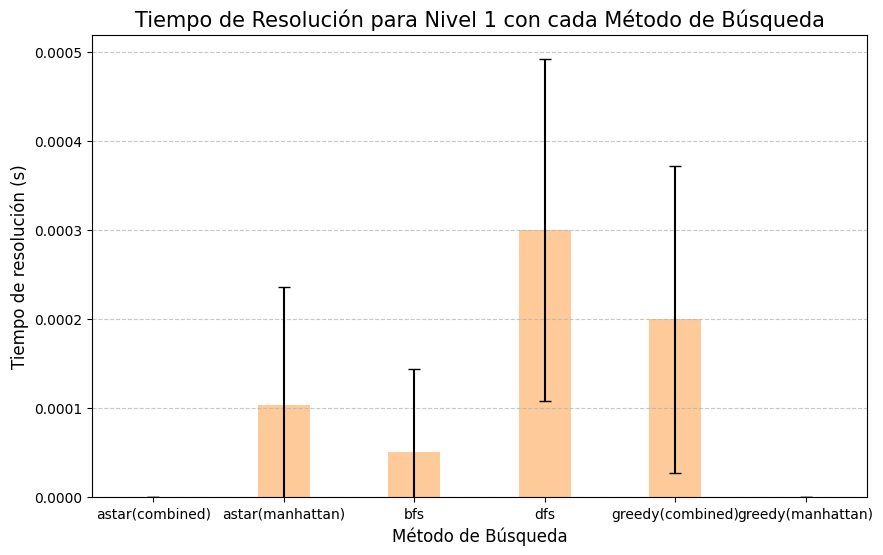

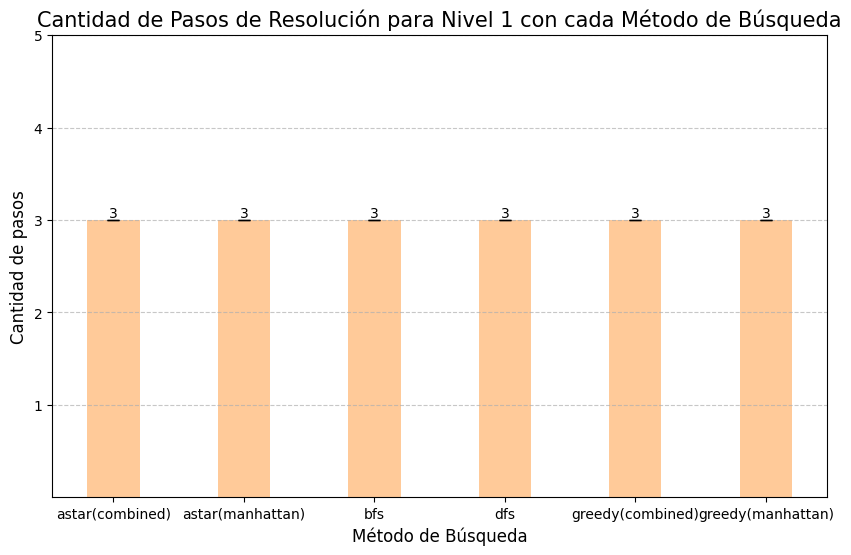

In [88]:
level_data = final_df.loc[final_df['level'] == 'level1.txt'].groupby(['method'], as_index=False)
mean_data = level_data.mean(numeric_only=True)
methods = mean_data['method'].tolist()
runtime = mean_data['runtime'].tolist()
std_error_runtime = (level_data.std(numeric_only=True)['runtime'] / np.sqrt(len(level_data['runtime'].mean()['runtime']))).tolist()

plt.figure(figsize=(10,6))
plt.bar(methods, runtime, yerr=std_error_runtime, capsize=4, color='#ffca99', width=0.4)
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.title('Tiempo de Resolución para Nivel 1 con cada Método de Búsqueda', fontsize=15)
plt.xlabel('Método de Búsqueda', fontsize=12)
plt.ylabel('Tiempo de resolución (s)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0)
plt.show()

# -------------------------------------------------------------------------------------

cost = mean_data['cost'].tolist()
std_error_cost = (level_data.std(numeric_only=True)['cost'] / np.sqrt(len(level_data['cost'].mean()['cost']))).tolist()


#Grafico de pasos de resolucion
plt.figure(figsize=(10,6))
bars = plt.bar(methods, cost, yerr=std_error_cost, capsize=4, color='#ffca99', width=0.4)

for bar in bars:
    yval = bar.get_height()  # Obtener el valor de la barra
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, str(int(yval)), ha='center', va='bottom', fontsize=10)

plt.title('Cantidad de Pasos de Resolución para Nivel 1 con cada Método de Búsqueda', fontsize=15)
plt.xlabel('Método de Búsqueda', fontsize=12)
plt.ylabel('Cantidad de pasos', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.yticks(range(1,6))
plt.show()

### Nivel 2

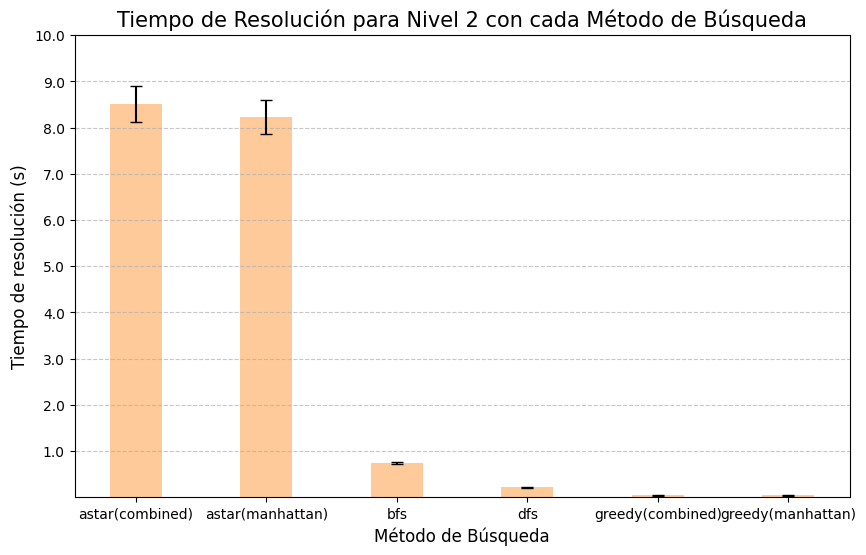

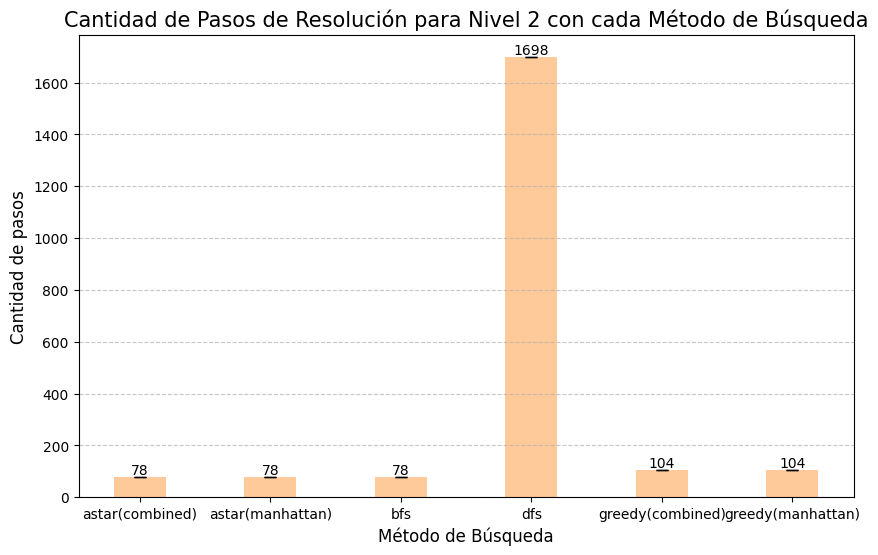

In [93]:
level_data = final_df.loc[final_df['level'] == 'level2.txt'].groupby(['method'], as_index=False)
mean_data = level_data.mean(numeric_only=True)

methods = mean_data['method'].tolist()
runtime = mean_data['runtime'].tolist()
std_error_runtime = (level_data.std(numeric_only=True)['runtime'] / np.sqrt(len(level_data['runtime'].mean()['runtime']))).tolist()

yvalues = []
for n in range(1, 11):  
    yvalues.append(float(n))

plt.figure(figsize=(10,6))
plt.bar(methods, runtime, yerr=std_error_runtime, capsize=4, color='#ffca99', width=0.4)

def float_formatter(x, pos):
    return '{:.1f}'.format(x)
formatter = FuncFormatter(float_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Tiempo de Resolución para Nivel 2 con cada Método de Búsqueda', fontsize=15)
plt.xlabel('Método de Búsqueda', fontsize=12)
plt.ylabel('Tiempo de resolución (s)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0)
plt.yticks(yvalues)
plt.show()

# -------------------------------------------------------------------------------------

cost = mean_data['cost'].tolist()
std_error_cost = (level_data.std(numeric_only=True)['cost'] / np.sqrt(len(level_data['cost'].mean()['cost']))).tolist()


#Grafico de pasos de resolucion
plt.figure(figsize=(10,6))
bars = plt.bar(methods, cost, yerr=std_error_cost, capsize=4, color='#ffca99', width=0.4)

for bar in bars:
    yval = bar.get_height()  # Obtener el valor de la barra
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, str(int(yval)), ha='center', va='bottom', fontsize=10)


plt.title('Cantidad de Pasos de Resolución para Nivel 2 con cada Método de Búsqueda', fontsize=15)
plt.xlabel('Método de Búsqueda', fontsize=12)
plt.ylabel('Cantidad de pasos', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Nivel 3

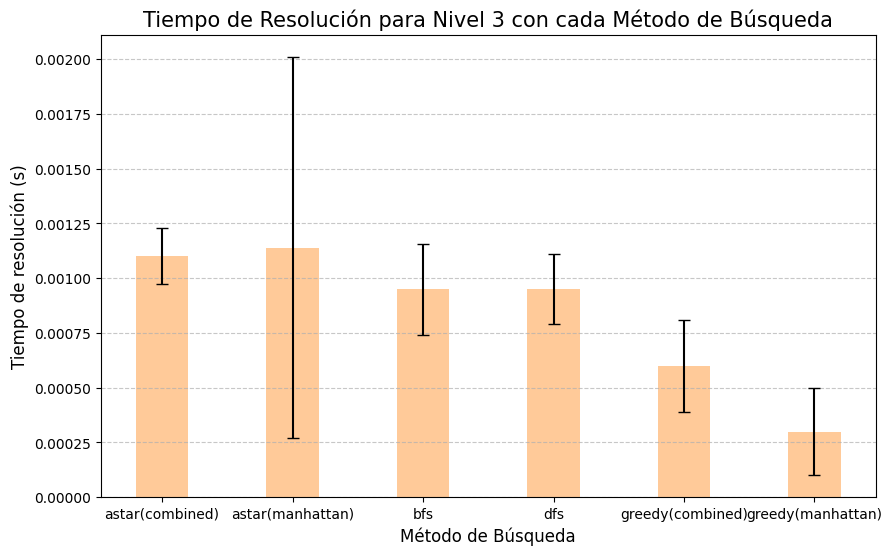

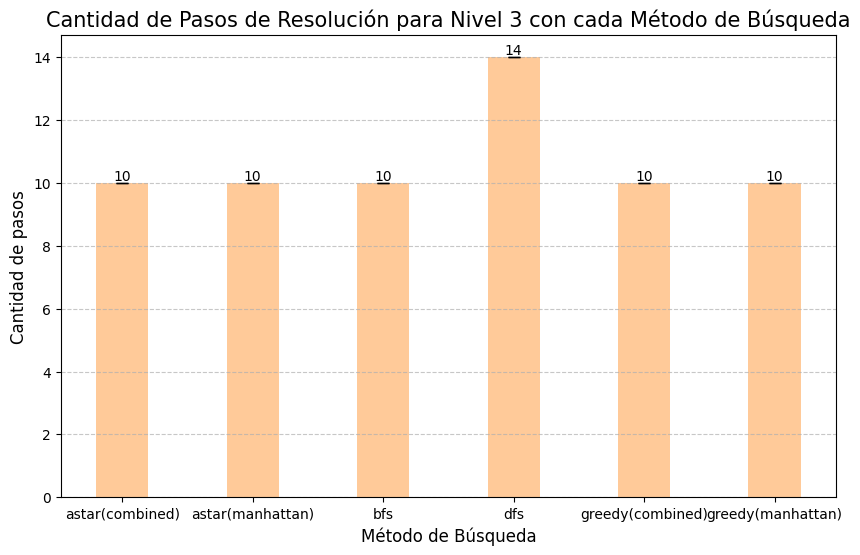

In [87]:
level_data = final_df.loc[final_df['level'] == 'level3.txt'].groupby(['method'], as_index=False)
mean_data = level_data.mean(numeric_only=True)

methods = mean_data['method'].tolist()
runtime = mean_data['runtime'].tolist()
std_error_runtime = (level_data.std(numeric_only=True)['runtime'] / np.sqrt(len(level_data['runtime'].mean()['runtime']))).tolist()

plt.figure(figsize=(10,6))
plt.bar(methods, runtime, yerr=std_error_runtime, capsize=4, color='#ffca99', width=0.4)
plt.title('Tiempo de Resolución para Nivel 3 con cada Método de Búsqueda', fontsize=15)
plt.xlabel('Método de Búsqueda', fontsize=12)
plt.ylabel('Tiempo de resolución (s)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0)
plt.show()

# -------------------------------------------------------------------------------------

cost = mean_data['cost'].tolist()
std_error_cost = (level_data.std(numeric_only=True)['cost'] / np.sqrt(len(level_data['cost'].mean()['cost']))).tolist()


#Grafico de pasos de resolucion
plt.figure(figsize=(10,6))
bars = plt.bar(methods, cost, yerr=std_error_cost, capsize=4, color='#ffca99', width=0.4)

for bar in bars:
    yval = bar.get_height()  # Obtener el valor de la barra
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, str(int(yval)), ha='center', va='bottom', fontsize=10)

plt.title('Cantidad de Pasos de Resolución para Nivel 3 con cada Método de Búsqueda', fontsize=15)
plt.xlabel('Método de Búsqueda', fontsize=12)
plt.ylabel('Cantidad de pasos', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Nivel 4

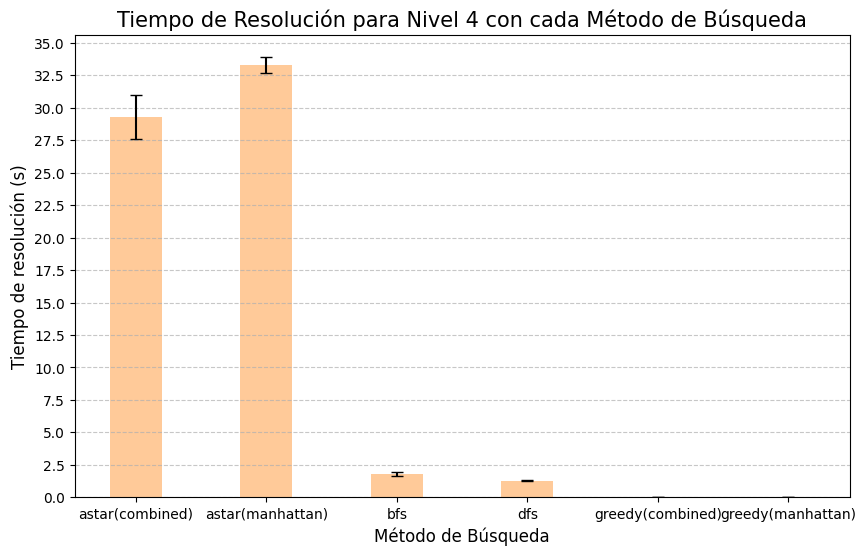

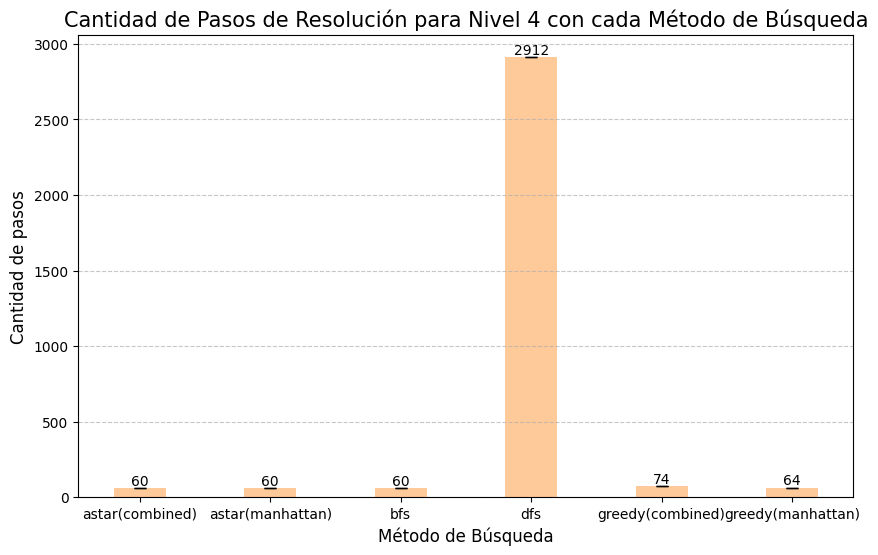

In [85]:
level_data = final_df.loc[final_df['level'] == 'level4.txt'].groupby(['method'], as_index=False)
mean_data = level_data.mean(numeric_only=True)

methods = mean_data['method'].tolist()
runtime = mean_data['runtime'].tolist()
std_error_runtime = (level_data.std(numeric_only=True)['runtime'] / np.sqrt(len(level_data['runtime'].mean()['runtime']))).tolist()

yvalues = []
for n in range(0, 360, 25):
    yvalues.append(n/10.0)

#Grafico de tiempo de resolucion
plt.figure(figsize=(10,6))
plt.bar(methods, runtime, yerr=std_error_runtime, capsize=4, color='#ffca99', width=0.4)
plt.title('Tiempo de Resolución para Nivel 4 con cada Método de Búsqueda', fontsize=15)
plt.xlabel('Método de Búsqueda', fontsize=12)
plt.ylabel('Tiempo de resolución (s)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0)
plt.yticks(yvalues)
plt.show()

# -------------------------------------------------------------------------------------
cost = mean_data['cost'].tolist()
std_error_cost = (level_data.std(numeric_only=True)['cost'] / np.sqrt(len(level_data['cost'].mean()['cost']))).tolist()


#Grafico de pasos de resolucion
plt.figure(figsize=(10,6))
bars = plt.bar(methods, cost, yerr=std_error_cost, capsize=4, color='#ffca99', width=0.4)

for bar in bars:
    yval = bar.get_height()  # Obtener el valor de la barra
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, str(int(yval)), ha='center', va='bottom', fontsize=10)

plt.title('Cantidad de Pasos de Resolución para Nivel 4 con cada Método de Búsqueda', fontsize=15)
plt.xlabel('Método de Búsqueda', fontsize=12)
plt.ylabel('Cantidad de pasos', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

